In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gufthugu-publications-orders-dataset-challenge/Gufthugu publication orders.csv


# Importing Libraries

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from re import match
import datetime
datetime.datetime.strptime

%matplotlib inline  
                     # Once this command is executed in any cell, the matplotlib plots will appear
                     # directly below the cell in which the plot function was called for the rest
                       #of the session.

plt.style.use('bmh') # the styling will be applied not only to the first plot you create, 
                       #but all the plots of the session

# 

# Loading file

In [3]:
df = pd.read_csv('/kaggle/input/gufthugu-publications-orders-dataset-challenge/Gufthugu publication orders.csv')

In [4]:
df.head(5)

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


# Task to perform
> 1. Find best selling Book.
> 2. Visualize order status frequency
> 3. Find a correlation between date and time with order status
> 4. Find a correlation between city and order status
> 5. Find any hidden patterns that are counter-intuitive for a layman
> 6. Can we predict number of orders, or book names in advance?Tasks to achieve

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()   #It shows the of all missing values in each column

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

> *Here we have one 2 missing values in Book Name, 1 in City and 10 in Payment Method*

# Arranging Dataframe

In [7]:
df.rename(columns = {'City':'Address'},inplace=True)  #Column 'City' is renamed with 'Address'
df.rename(columns = {'Order Date & Time': 'Order Date'},inplace=True)  #inplae=True means make changes in df permanently

df['Book Name'] = df['Book Name'].apply(str)
df['Address'] = df['Address'].apply(str)
df['Order Status'] = df['Order Status'].apply(str)

df['Hour'] = df['Order Date'].str.extract(r'(\d?\d):') #extracting time from dateandtime column
df['Order Date'] = pd.to_datetime(df['Order Date'])    #to set date formate yyyymmdd
df['Time'] = df['Order Date'].dt.strftime('%H:%M')     # made a column name 'Time' having hours and min from 'Order Date'
df['Month Year'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df['Full Date'] = pd.to_datetime(df['Order Date']).dt.date

df['Day'] = pd.to_datetime(df['Order Date']).dt.day_name()  #made a column 'Day' with day name
df['Date'] = pd.to_datetime(df['Order Date']).dt.day

In [8]:
df.head(3)

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,2019-10-03 15:03:00,faisalabad,NaN,2,200.0,15,15:03,2019-10,2019-10-03,Thursday,3
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3


# Data Preprocessing

> Converting the address in lower case

In [9]:
df['Address'] = df['Address'].str.lower()

In [10]:
df.head(3)

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,2019-10-03 15:03:00,faisalabad,NaN,2,200.0,15,15:03,2019-10,2019-10-03,Thursday,3
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery (COD),1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,hyderabad,Cash on Delivery (COD),2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3


> Removing the null values

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum()

Order Number            0
Order Status            0
Book Name               0
Order Date              0
Address                 0
Payment Method          0
Total items             0
Total weight (grams)    0
Hour                    0
Time                    0
Month Year              0
Full Date               0
Day                     0
Date                    0
dtype: int64

**Cleaning the 'Address' Column** 
> There are a lot addresses in data due to wrong name of cities during typing. Having multiple cities like dha lahore or lhr similarly karachi like khr cantt and added distt. with the same city names etc . A lot of garbage in Address column. Maximum city names are incorrect.
We need to clean it.

In [13]:
print('There are',len(df['Address'].unique()), 'Different cities')  

There are 3600 Different cities


In [14]:
df['Address'].value_counts()

karachi                            2680
lahore                             2183
islamabad                           946
rawalpindi                          696
faisalabad                          524
                                   ... 
dha lahore                            1
basti machar wala thesil alipur       1
thana bula khan                       1
mandi bhuddin punjab pakistan         1
mailsi, district vehari               1
Name: Address, Length: 3600, dtype: int64

In [15]:
df.Address.sample(30)

2050                                                lahore
16795                                            fazil pur
7712                                                 okara
14257                                             arifwala
12648                                               lahore
2706                                     mandi baba ud din
12655                            satellite town gujranwala
5209                                            temargarah
13836                                               lahore
18905                                          rawal pindi
6992                                            bahawalpur
14453                                               lahore
7096                                              sargodha
14333                                              karachi
8339                                          lahore cantt
16688                                               lahore
472                                                 laho

> Now next step is to remove space and special characters. by using str.replace('old string','new string')

In [16]:
df['Address'] = df['Address'].str.replace(',','').str.replace('?','').str.replace('\d+','').str.replace('[','').str.replace(']','').str.strip()
#str.strip() used to remove from begninning and end

/tmp/ipykernel_21/4233267148.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Address'] = df['Address'].str.replace(',','').str.replace('?','').str.replace('\d+','').str.replace('[','').str.replace(']','').str.strip()
/tmp/ipykernel_21/4233267148.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace(',','').str.replace('?','').str.replace('\d+','').str.replace('[','').str.replace(']','').str.strip()


> Using the list of Pakistan cities (by github: https://www.kaggle.com/code/hammad40241/gufhtugu-publications-analysis?scriptVersionId=56869410&cellId=48 ) .
We will try to correct the city names.

In [17]:
pak_cities = ['islamabad', 'ahmed nager chatha', 'ahmadpur east', 'ali khan abad', 'alipur', 'arifwala', 'attock', 'bhera',
              'bhalwal', 'bahawalnagar','bahawalpur', 'bhakkar', 'burewala', 'chillianwala', 'chakwal', 'chichawatni',
              'chiniot', 'chishtian',
              'daska', 'darya khan', 'dera ghazi khan', 'dhaular', 'dina', 'dinga', 'dipalpur', 'faisalabad', 'ferozewala',
              'fateh jhang','ghakhar mandi', 'gojra', 'gujranwala', 'gujrat', 'gujar khan', 'hafizabad', 'haroonabad', 'hasilpur',
              'haveli lakha', 'jatoi',
              'jalalpur', 'jattan', 'jampur', 'jaranwala', 'jhang', 'jhelum', 'kalabagh', 'karor lal esan', 'kasur', 'kamalia', 'kamoke',
              'khanewal',
              'khanpur', 'kharian', 'khushab', 'kot addu', 'jauharabad', 'lahore', 'lalamusa', 'layyah', 'liaquat pur',
              'lodhran', 'malakwal', 'mamoori', 'mailsi', 'mandi bahauddin', 'mian channu', 'mianwali', 'multan', 'murree', 
              'muridke', 'mianwali bangla', 'muzaffargarh', 'narowal', 'nankana sahib', 'okara', 'renala khurd', 'pakpattan', 
              'pattoki', 'pir mahal', 'qaimpur', 'qila didar singh', 'rabwah', 'raiwind', 'rajanpur', 'rahim yar khan',
              'rawalpindi',
              'sadiqabad', 'safdarabad', 'sahiwal', 'sangla hill', 'sarai alamgir', 'sargodha', 'shakargarh', 'sheikhupura',
              'sialkot',
              'sohawa', 'soianwala', 'siranwali', 'talagang', 'taxila', 'toba tek singh', 'vehari', 'wah cantonment', 
              'wazirabad',
              'badin', 'bhirkan', 'rajo khanani', 'chak', 'dadu', 'digri', 'diplo', 'dokri', 'ghotki', 'haala', 'hyderabad',
              'islamkot', 'jacobabad', 'jamshoro', 'jungshahi', 'kandhkot', 'kandiaro', 'karachi', 'kashmore', 'keti bandar',
              'khairpur', 'kotri', 'larkana', 'matiari', 'mehar', 'mirpur khas', 'mithani', 'mithi', 'mehrabpur', 'moro',
              'nagarparkar', 'naudero', 'naushahro feroze', 'naushara', 'nawabshah', 'nazimabad', 'qambar', 'qasimabad', 
              'ranipur', 'ratodero', 'rohri', 'sakrand', 'sanghar', 'shahbandar', 'shahdadkot', 'shahdadpur',
              'shahpur chakar', 'shikarpaur', 'sukkur', 'tangwani', 'tando adam khan', 'tando allahyar',
              'tando muhammad khan', 'thatta', 'umerkot', 'warah', 'abbottabad', 'adezai', 'alpuri', 'akora khattak',
              'ayubia', 'banda daud shah', 'bannu', 'batkhela', 'battagram', 'birote', 'chakdara', 'charsadda', 'chitral',
              'daggar', 'dargai', 'darya khan', 'dera ismail khan', 'doaba', 'dir', 'drosh', 'hangu', 'haripur', 'karak',
              'kohat', 'kulachi', 'lakki marwat', 'latamber', 'madyan', 'mansehra', 'mardan', 'mastuj', 'mingora', 'nowshera',
              'paharpur', 'pabbi', 'peshawar', 'saidu sharif', 'shorkot', 'shewa adda', 'swabi', 'swat', 'tangi', 'tank',
              'thall', 'timergara', 'tordher', 'awaran', 'barkhan', 'chagai', 'dera bugti', 'gwadar', 'harnai', 'jafarabad',
              'jhal magsi', 'kacchi', 'kalat', 'kech', 'kharan', 'khuzdar', 'killa abdullah', 'killa saifullah', 'kohlu',
              'lasbela', 'lehri', 'loralai', 'mastung', 'musakhel', 'nasirabad', 'nushki', 'panjgur', 'pishin valley', 
              'quetta', 'sherani', 'sibi', 'sohbatpur', 'washuk', 'zhob', 'ziarat']


> Now make a function clear_address to clean address column

In [18]:
def clear_address(Address):
    for i in pak_cities:
        if i in str(Address):
            return i
    return Address    

> Apply function

In [19]:
df['Address'] = df['Address'].apply(clear_address)

In [20]:
df['Address'].nunique()

1857

In [21]:
print('After appling function number of address reduces to:',df['Address'].nunique())

After appling function number of address reduces to: 1857


In [22]:
df['Address'].unique()

array(['rawalpindi', 'hyderabad', 'karachi', ..., 'مانسہرہ',
       'khurrian wala', 'ajk city kotli'], dtype=object)

In [23]:
df.head(10)

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery (COD),1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,hyderabad,Cash on Delivery (COD),2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,rawalpindi,Cash on Delivery (COD),1,200.0,16,16:42,2019-10,2019-10-03,Thursday,3
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,karachi,Cash on Delivery (COD),1,200.0,16,16:44,2019-10,2019-10-03,Thursday,3
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 18:17:00,fsd,Cash on Delivery (COD),5,200.0,18,18:17,2019-10,2019-10-03,Thursday,3
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,2019-10-03 19:34:00,karach,Cash on Delivery (COD),2,200.0,19,19:34,2019-10,2019-10-03,Thursday,3
8,316,Completed,Har Shaye Ka Nazria - ہر شے کا نظریہ/Molo Masa...,2019-10-03 20:27:00,karachi,Cash on Delivery (COD),2,200.0,20,20:27,2019-10,2019-10-03,Thursday,3
9,3162,Completed,(C++) ++سی/سی/A Brief History of Money/Band ka...,2019-11-12 12:40:00,islamabad,Cash on delivery,8,200.0,12,12:40,2019-11,2019-11-12,Tuesday,12
10,3170,Completed,Data Structures,2019-11-12 14:30:00,nankana sahib,Cash on delivery,1,200.0,14,14:30,2019-11,2019-11-12,Tuesday,12
11,3182,Completed,Data Structures/Bit Coin Block Chain aur Crypt...,2019-11-12 17:38:00,sialkot,Cash on delivery,2,200.0,17,17:38,2019-11,2019-11-12,Tuesday,12


> More over we can replace the short form like fsd, lhr into full name faisalabad, lahore etc.

In [24]:
df['Address'].replace({"khi": "karachi", "lhr": "lahore", 'lhr':'lahore', 'rwp':'rawalpindi',
                  'isb':'islamabad', ' ':'','karachu':'karachi','queeta':'quetta', 
                  'fsd':'faisalabad'}, inplace=True)

In [25]:
df.head()

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery (COD),1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,hyderabad,Cash on Delivery (COD),2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,rawalpindi,Cash on Delivery (COD),1,200.0,16,16:42,2019-10,2019-10-03,Thursday,3
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,karachi,Cash on Delivery (COD),1,200.0,16,16:44,2019-10,2019-10-03,Thursday,3
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 18:17:00,faisalabad,Cash on Delivery (COD),5,200.0,18,18:17,2019-10,2019-10-03,Thursday,3


In [26]:
df['Address'].nunique()  #reduces from 1857 to 1850

1850

> More over removing the incorrect city names in address column.  Use nltk Library to remove the incorrect names. country, city , town also included in data , remove it.

In [27]:
import nltk 

def clear_address(row):
    adres = row.Address.split()
    add = set()
    for a in adres:
        a = a.strip()
        if a:
            add.add(a)
    for city in pak_cities:
        if row.Address.__contains__(city):
            return city
        
    for a in add:
        for c in pak_cities:
            if nltk.edit_distance(a, c) <= 15:
                return c
            
    return row.Address        

In [28]:
df['Address'] = df.apply(clear_address, axis = 1)

In [29]:
df.Address.nunique()    # reduced from 1750 to 192

192

**Cleaning column Payment Method** 

In [30]:
df['Payment Method'].replace('Cash on Delivery (COD)','Cash on Delivery',inplace=True)

In [31]:
df.head()

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery,1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,hyderabad,Cash on Delivery,2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3
3,310,Cancelled,Kaggle for Begginers,2019-10-03 16:42:00,rawalpindi,Cash on Delivery,1,200.0,16,16:42,2019-10,2019-10-03,Thursday,3
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,karachi,Cash on Delivery,1,200.0,16,16:44,2019-10,2019-10-03,Thursday,3
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 18:17:00,faisalabad,Cash on Delivery,5,200.0,18,18:17,2019-10,2019-10-03,Thursday,3


**Cleaning Book Name column**

In [32]:
df['Book Name'].nunique()

3519

In [33]:
df['Book Name'].sample(20)

11796    انٹرنیٹ سے پیسہ کمائیں/Sukkur To Florida/Bedar...
15268    ڈیٹا سائنس/مشین لرننگ/Artificial Intelligence/...
13394                                           مشین لرننگ
2497                                    Product Management
6834                               Artificial Intelligence
15333                                     ایک تھا الگورتھم
4025                               Artificial Intelligence
314                                 ڈیٹا سائنس ۔ ایک تعارف
1626                                     Justju ka safar-1
1239                                  Kaggle for Begginers
3562                                     Justju ka safar-1
15115    Nafas k Banday/Omer Khayam/Oont/Piayary Nabi (...
1758                                           Molo Masali
18700                             A Brief History of Money
6754                                    Python Programming
2577                                           Molo Masali
42                                R ka Taaruf  آر کا تعا

In [34]:
df['Book Name'].value_counts()

انٹرنیٹ سے پیسہ کمائیں                                                                                                                           2579
Python Programming                                                                                                                               1540
Blockchain, Cryptocurrency And Bitcoin                                                                                                           1067
Product Management                                                                                                                               1041
Artificial Intelligence                                                                                                                           900
                                                                                                                                                 ... 
Animal Form/Chalta Purza (Translation)/Apni Sogawar Beswaon ki Yadain/Boorha aur samundar (translati

> Converting into lower case

In [35]:
df['Book Name'] = df['Book Name'].str.lower()

> Removing the special characters

In [36]:
df['Book Name'] = df['Book Name'].str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.strip()

/tmp/ipykernel_21/1734271323.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Book Name'] = df['Book Name'].str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.strip()


> Removing the names with wrong text.

In [37]:
df['Book Name'] = df['Book Name'].str.replace("python programming- release date: august 14, 2020" , "python programming")
df['Book Name'] = df['Book Name'].str.replace("انٹرنیٹ سے پیسہ کمائیں؟- مستحقین زکواة" , "")
df['Book Name'] = df['Book Name'].str.replace("molo masali - مولو مصلی" , "molo masali" )
df['Book Name'] = df['Book Name'].str.replace("r ka taaruf  آر کا تعارف" , "r ka taaruf")
df['Book Name'] = df['Book Name'].str.replace("linux - an introduction release data - october 3, 2020" , "linux - an introduction")

In [38]:
df['Book Name'].nunique()

3504

In [39]:
df.head()

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
1,308,Completed,kaggle for begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery,1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,kaggle for begginers/bitcoin blockchain aur cr...,2019-10-03 16:09:00,hyderabad,Cash on Delivery,2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3
3,310,Cancelled,kaggle for begginers,2019-10-03 16:42:00,rawalpindi,Cash on Delivery,1,200.0,16,16:42,2019-10,2019-10-03,Thursday,3
4,311,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 16:44:00,karachi,Cash on Delivery,1,200.0,16,16:44,2019-10,2019-10-03,Thursday,3
5,312,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 18:17:00,faisalabad,Cash on Delivery,5,200.0,18,18:17,2019-10,2019-10-03,Thursday,3


> There are multiple book names in each order seperate them with /.

In [40]:
for i in df['Book Name'].tail(10).str.split('/'):
    print(i)

['blockchain, cryptocurrency and bitcoin']
['artificial intelligence', 'blockchain, cryptocurrency and bitcoin']
['kaggle for begginers', 'blockchain, cryptocurrency and bitcoin', 'justju ka safar-1', 'introduction to blockchain with case studies', 'waqfa e pareshani']
['kaggle for begginers', 'blockchain, cryptocurrency and bitcoin', 'justju ka safar-1', 'introduction to blockchain with case studies', 'waqfa e pareshani']
['justju ka safar-1', 'مشین لرننگ', 'kaggle for begginers', 'waqfa e pareshani', 'book band kamron ki muhabbat', 'ایک تھا الگورتھم', 'زرد کاغذ', 'ارفع کریم', 'thoughts - a journal', 'بوسنیا پر کیا گذری؟', 'ڈیٹا سائنس']
['linux - an introduction']
['r ka taaruf', 'ڈیٹا سائنس', 'python programming', 'kaggle for begginers']
['blockchain, cryptocurrency and bitcoin', 'column nigari kese sekhain']
['مشین لرننگ', 'ڈیٹا سائنس', 'artificial intelligence', 'blockchain, cryptocurrency and bitcoin', 'python programming', 'انٹرنیٹ سے پیسہ کمائیں', 'r ka taaruf', 'introduction to

> Each book in a separate row.

In [41]:
df['Book Name'] = df['Book Name'].str.split('/').str[0]

In [42]:
df.head()

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
1,308,Completed,kaggle for begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery,1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,kaggle for begginers,2019-10-03 16:09:00,hyderabad,Cash on Delivery,2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3
3,310,Cancelled,kaggle for begginers,2019-10-03 16:42:00,rawalpindi,Cash on Delivery,1,200.0,16,16:42,2019-10,2019-10-03,Thursday,3
4,311,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 16:44:00,karachi,Cash on Delivery,1,200.0,16,16:44,2019-10,2019-10-03,Thursday,3
5,312,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 18:17:00,faisalabad,Cash on Delivery,5,200.0,18,18:17,2019-10,2019-10-03,Thursday,3


In [43]:
df.tail(5)

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
19234,71332,Completed,linux - an introduction,2021-01-25 12:46:00,lahore,Cash on delivery,1,200.0,12,12:46,2021-01,2021-01-25,Monday,25
19235,71394,Completed,r ka taaruf,2021-01-25 14:06:00,lahore,Cash on delivery,4,200.0,14,14:06,2021-01,2021-01-25,Monday,25
19236,71418,Completed,"blockchain, cryptocurrency and bitcoin",2021-01-25 16:37:00,larkana,Cash on delivery,2,500.0,16,16:37,2021-01,2021-01-25,Monday,25
19237,71419,Completed,مشین لرننگ,2021-01-25 18:01:00,mailsi,Cash on delivery,10,400.0,18,18:01,2021-01,2021-01-25,Monday,25
19238,71420,Completed,linux - an introduction,2021-01-25 20:47:00,lahore,Cash on delivery,7,400.0,20,20:47,2021-01,2021-01-25,Monday,25


In [44]:
df['Book Name'].nunique()    #reduces from 3519 to 660

660

# 1. Find best selling book.

> انٹرنیٹ سے پیسہ کمائیں is the best selling book.

In [45]:
df['Book Name'].value_counts().head(10)

انٹرنیٹ سے پیسہ کمائیں                    3037
python programming                        2180
artificial intelligence                   1314
blockchain, cryptocurrency and bitcoin    1295
product management                        1141
justju ka safar-1                         1042
molo masali                                575
ڈیٹا سائنس ۔ ایک تعارف                     541
lucky draw - free book                     505
c++                                        467
Name: Book Name, dtype: int64

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


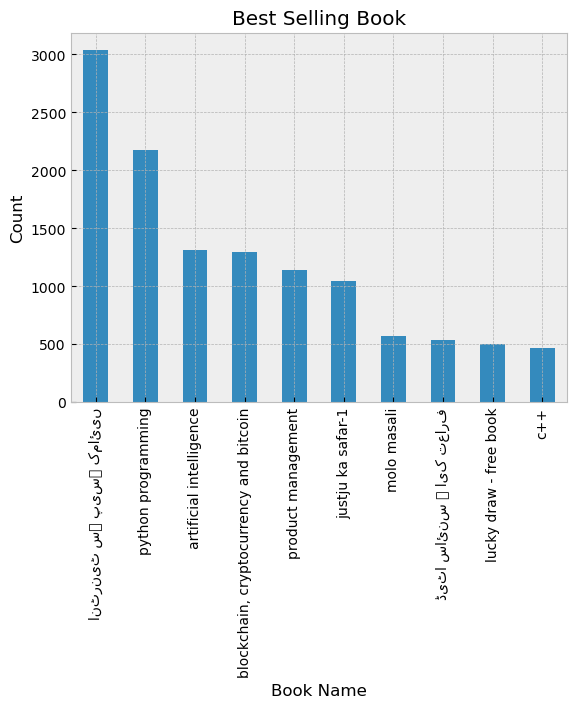

In [46]:
df['Book Name'].value_counts().head(10).plot.bar()
plt.title('Best Selling Book')
plt.xlabel('Book Name')
plt.ylabel('Count')
plt.show()

**Best selling Book Anually**

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fi

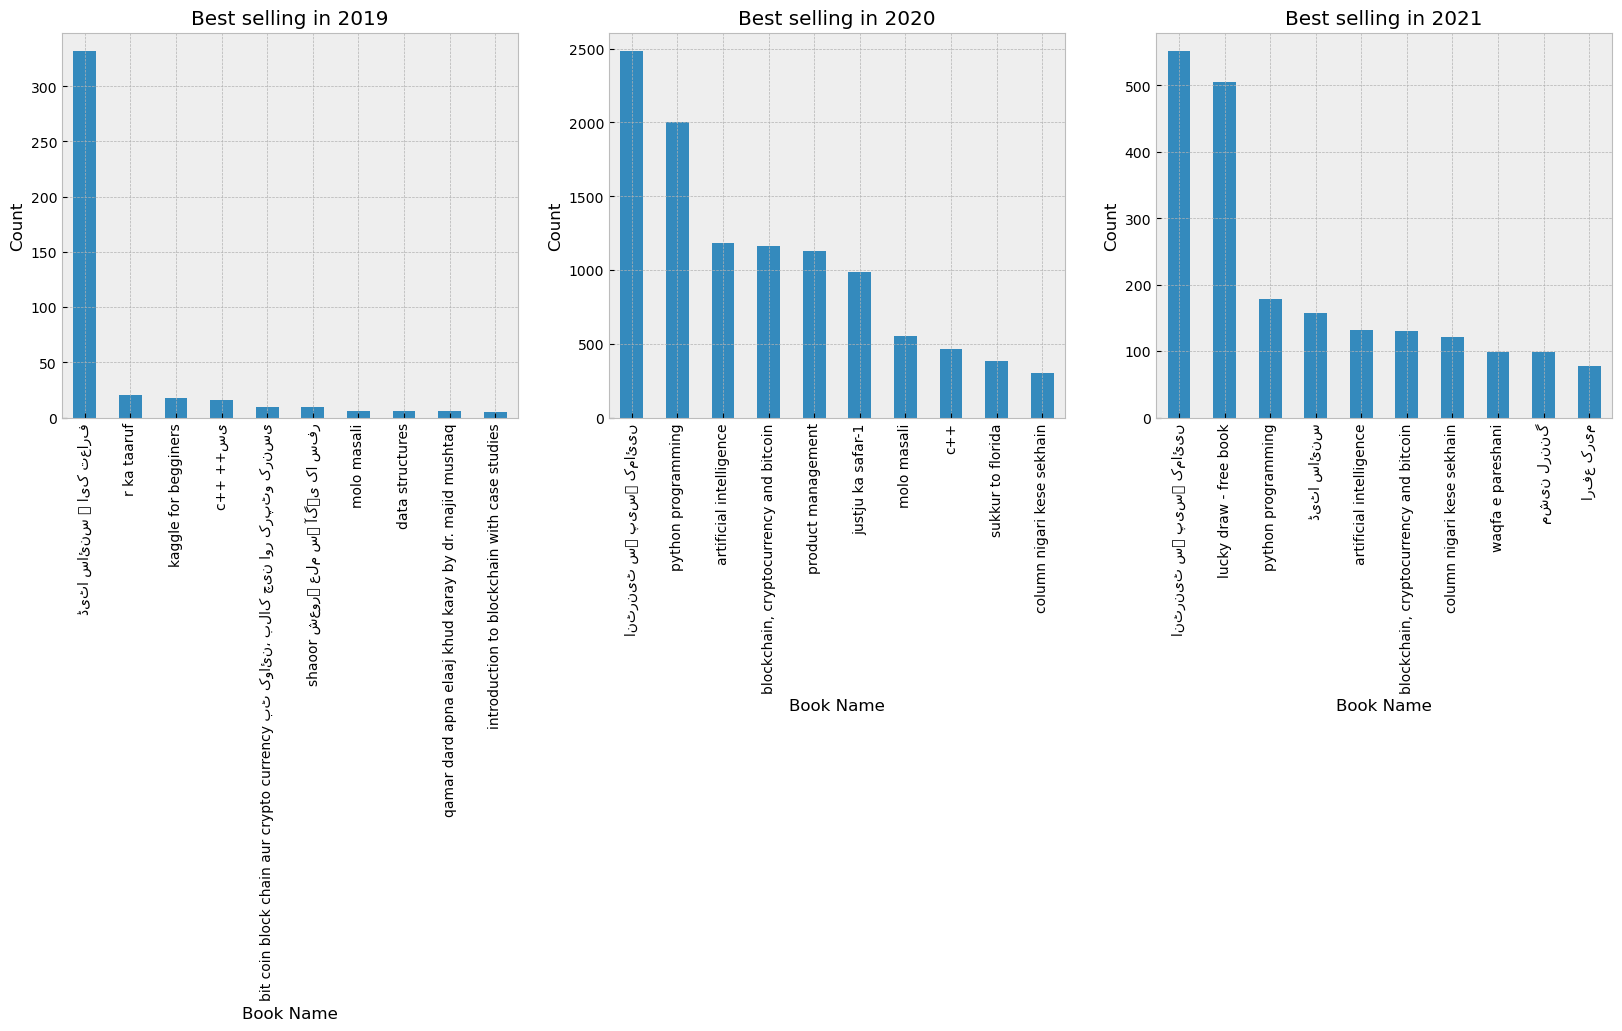

In [47]:
plt.figure(figsize=(20,5))

#best selling in 2019
plt.subplot(1,3,1)
plt.title('Best selling in 2019')
plt.xlabel('Book Name')
plt.ylabel('Count')
sell_2019 = df[df['Order Date'].dt.year == 2019]['Book Name'].value_counts().head(10).plot.bar()

#best selling in 2020
plt.subplot(1,3,2)
plt.title('Best selling in 2020')
plt.xlabel('Book Name')
plt.ylabel('Count')
sell_2020 = df[df['Order Date'].dt.year == 2020]['Book Name'].value_counts().head(10).plot.bar()

#best selling book in 2021
plt.subplot(1,3,3)
plt.title('Best selling in 2021')
plt.xlabel('Book Name')
plt.ylabel('Count')
sell_2021 = df[df['Order Date'].dt.year == 2021]['Book Name'].value_counts().head(10).plot.bar()

# 2.Visualize order status frequency

In [48]:
df['Order Status'].value_counts()

Completed    17938
Returned      1142
Cancelled      149
Name: Order Status, dtype: int64

[Text(0.5, 1.0, 'Order Status')]

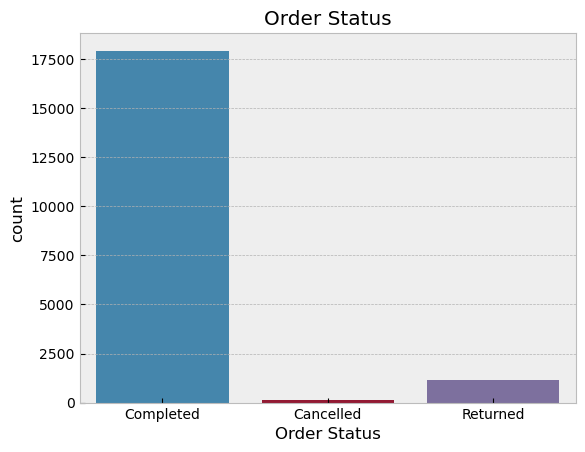

In [49]:
sns.countplot(data=df,x='Order Status').set(title = 'Order Status')

**Order status percentage**

In [50]:
Order_status_per = round((df['Order Status'].value_counts()/df['Order Status'].count())*100,1)
Order_status_per

Completed    93.3
Returned      5.9
Cancelled     0.8
Name: Order Status, dtype: float64

**Order Status Anually**

Text(0, 0.5, 'Count')

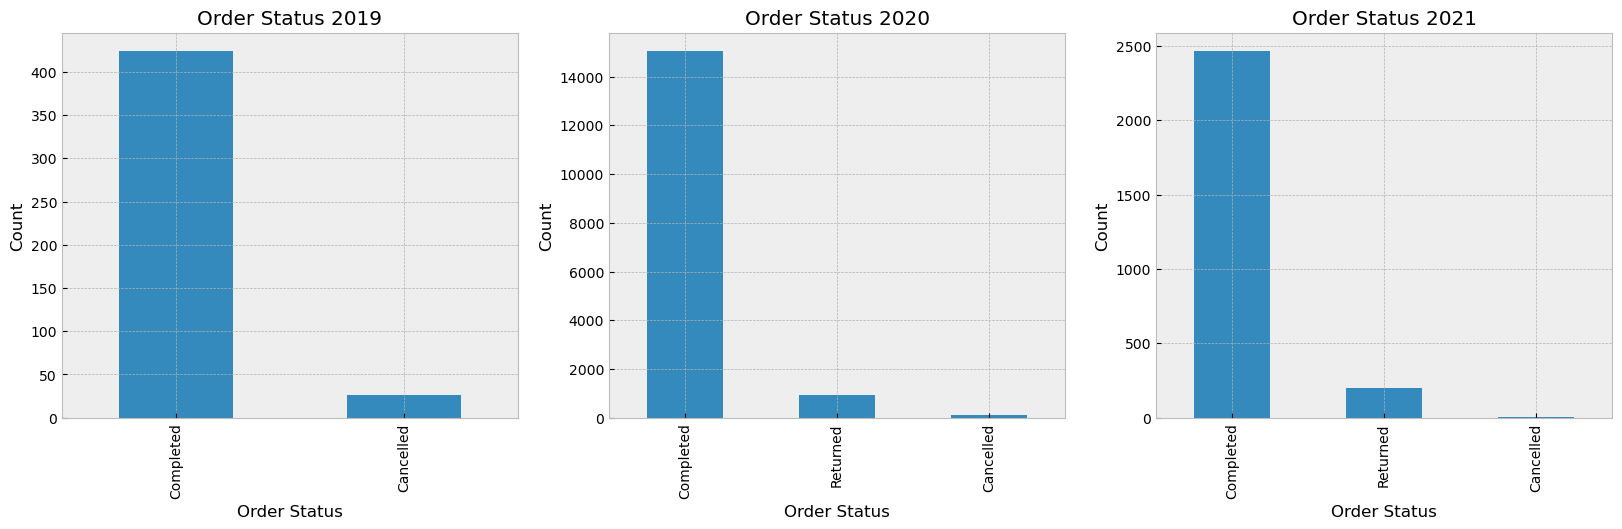

In [51]:
plt.figure(figsize=(20,5))

#Order status in 2019
plt.subplot(1,3,1)
OS_2019 = df[df['Order Date'].dt.year == 2019]['Order Status'].value_counts().plot.bar()
plt.title('Order Status 2019')
plt.xlabel('Order Status')
plt.ylabel('Count')

#Order Status in 2020
plt.subplot(1,3,2)
OS_2020 = df[df['Order Date'].dt.year == 2020]['Order Status'].value_counts().plot.bar()
plt.title('Order Status 2020')
plt.xlabel('Order Status')
plt.ylabel('Count')

#Order Status in 2021
plt.subplot(1,3,3)
OS_2021 = df[df['Order Date'].dt.year == 2021]['Order Status'].value_counts().plot.bar()
plt.title('Order Status 2021')
plt.xlabel('Order Status')
plt.ylabel('Count')

**Correlation order status with Books**

Text(0, 0.5, 'Count')

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Arabic natively.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 1748 (\N{ARABIC FULL STOP}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic native

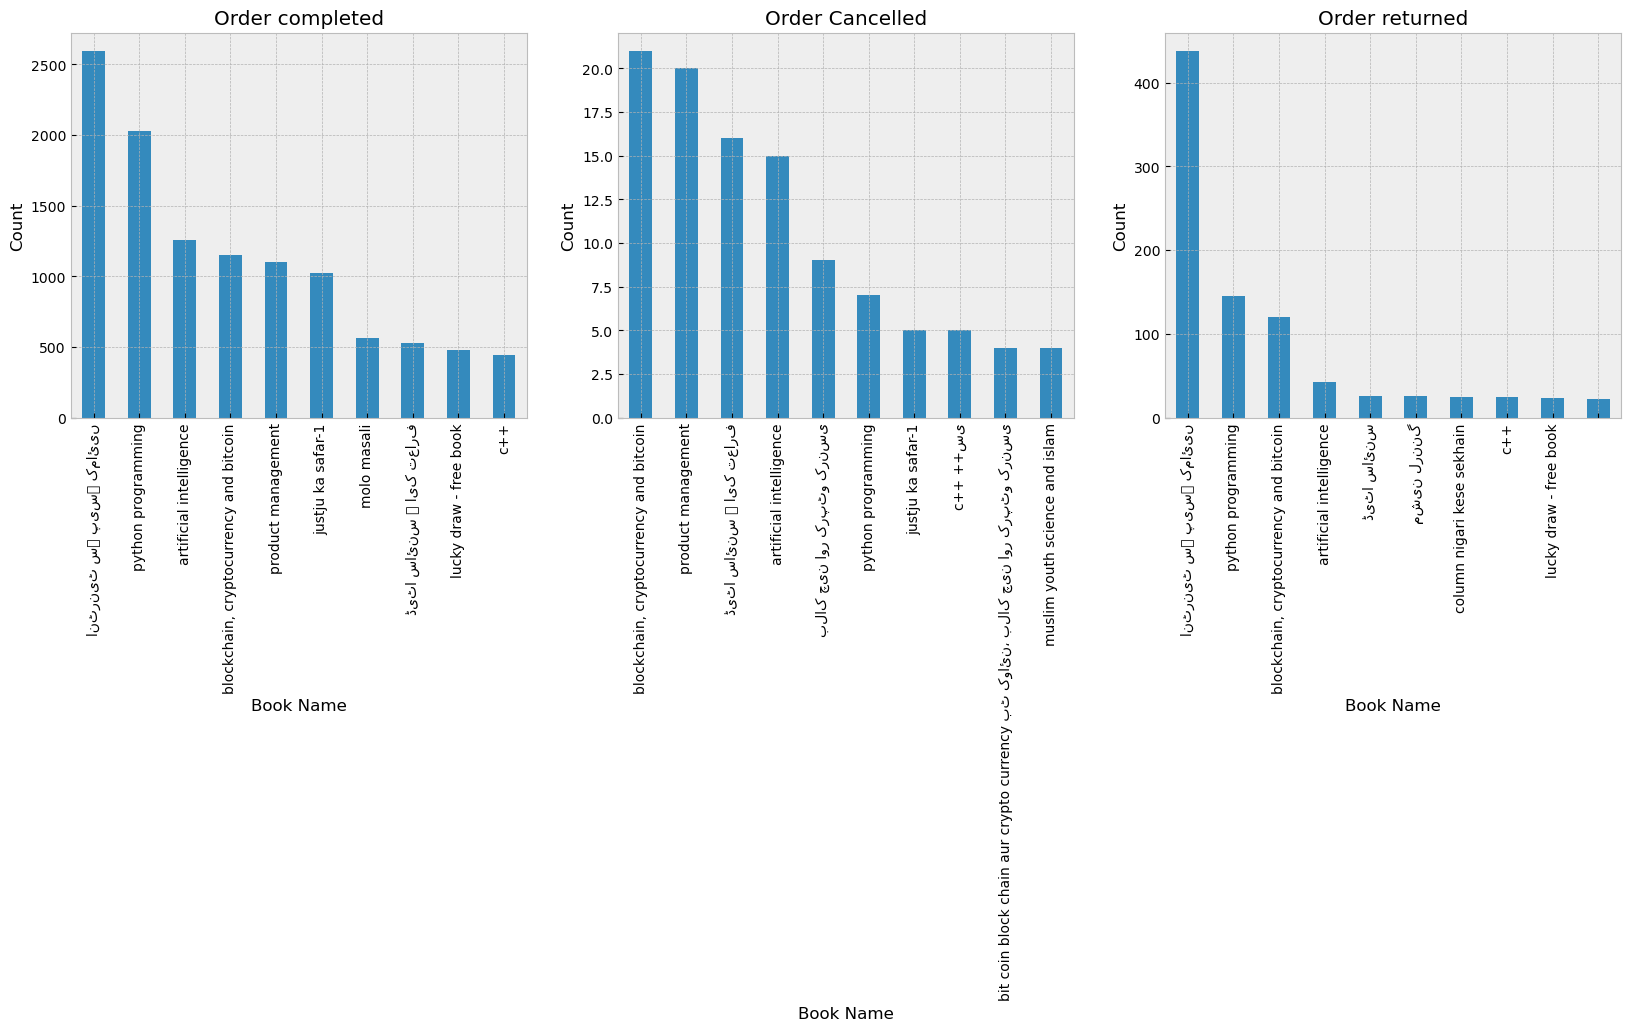

In [52]:
plt.figure(figsize=(20,5))

#Order completed
plt.subplot(1,3,1)
df[df['Order Status']=='Completed']['Book Name'].value_counts().head(10).plot.bar()
plt.title('Order completed')
plt.xlabel('Book Name')
plt.ylabel('Count')

#Order cancelled
plt.subplot(1,3,2)
df[df['Order Status']=='Cancelled']['Book Name'].value_counts().head(10).plot.bar()
plt.title('Order Cancelled')
plt.xlabel('Book Name')
plt.ylabel('Count')

#Order returned 
plt.subplot(1,3,3)
df[df['Order Status']=='Returned']['Book Name'].value_counts().head(10).plot.bar()
plt.title('Order returned')
plt.xlabel('Book Name')
plt.ylabel('Count')

# 3.Correlation between date and time with order status

/tmp/ipykernel_21/526686525.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr())


<Axes: >

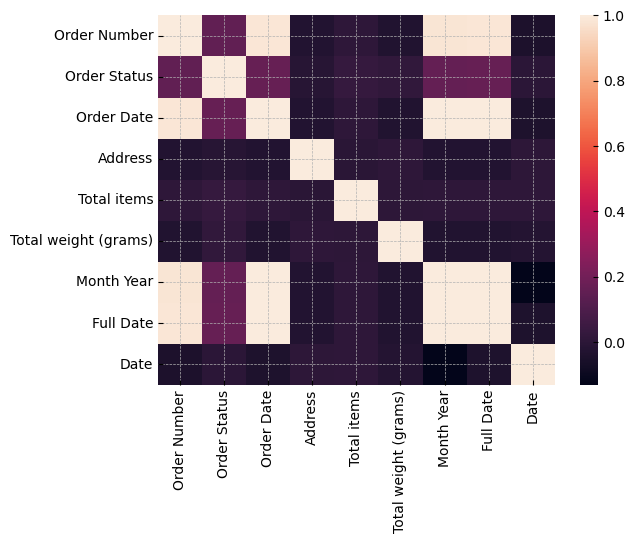

In [53]:
df2 = df.copy(deep=False)
df2['Order Status'] = df2['Order Status'].astype('category').cat.codes
df2['Address'] = df2['Address'].astype('category').cat.codes
df2['Month Year'] = df2['Month Year'].astype('category').cat.codes
df2['Order Date'] = pd.to_datetime(df2['Order Date'])
df2['Full Date'] = pd.to_datetime(df2['Full Date'])
df2['Order Date'] = pd.to_numeric(df2['Order Date'])
df2['Full Date'] = pd.to_numeric(df2['Full Date'])
sns.heatmap(df2.corr())

                      Order Status  Total items  Total weight (grams)  \
Order Status              1.000000     0.027613              0.014796   
Total items               0.027613     1.000000              0.001983   
Total weight (grams)      0.014796     0.001983              1.000000   
Full Date                 0.164961     0.008109             -0.034544   

                      Full Date  
Order Status           0.164961  
Total items            0.008109  
Total weight (grams)  -0.034544  
Full Date              1.000000  


/tmp/ipykernel_21/2304524122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df2.drop(['Order Number','Order Date', 'Date', 'Address','Month Year'],axis=1).corr())
/tmp/ipykernel_21/2304524122.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.drop(['Order Number','Order Date', 'Date', 'Address','Month Year'],axis=1).corr())


<Axes: >

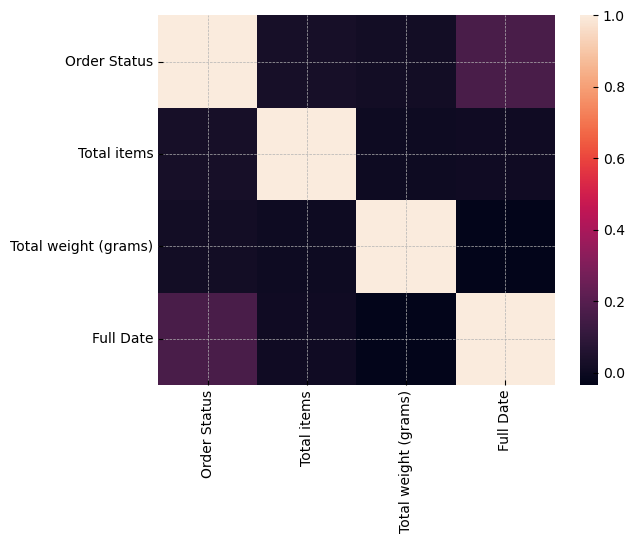

In [54]:
print(df2.drop(['Order Number','Order Date', 'Date', 'Address','Month Year'],axis=1).corr())
sns.heatmap(df2.drop(['Order Number','Order Date', 'Date', 'Address','Month Year'],axis=1).corr())

# 4.Correlation Order status with cities

In [55]:
print('Completed Orders with respect to cities')
df[df['Order Status'] == 'Completed']['Address'].value_counts()

Completed Orders with respect to cities


islamabad           4103
karachi             2880
lahore              2305
rawalpindi           760
faisalabad           553
                    ... 
daggar                 1
naudero                1
chagai                 1
warah                  1
qila didar singh       1
Name: Address, Length: 191, dtype: int64

In [56]:
print('Returned Orders with respect to cities')
df[df['Order Status'] == 'Returned']['Address'].value_counts()

Returned Orders with respect to cities


islamabad         416
karachi           114
lahore             89
rawalpindi         38
peshawar           32
                 ... 
jamshoro            1
karor lal esan      1
sheikhupura         1
dadu                1
bhakkar             1
Name: Address, Length: 114, dtype: int64

In [57]:
print('Cancelled Orders with respect to cities')
df[df['Order Status'] == 'Cancelled']['Address'].value_counts()

Cancelled Orders with respect to cities


islamabad           50
karachi             24
lahore              11
peshawar             6
rawalpindi           4
faisalabad           4
bahawalpur           4
multan               4
swat                 3
mansehra             3
bahawalnagar         2
burewala             2
khanpur              2
gujranwala           2
okara                2
mingora              2
bhalwal              1
kulachi              1
sargodha             1
gwadar               1
moro                 1
paharpur             1
sadiqabad            1
naushahro feroze     1
bhakkar              1
alipur               1
karak                1
lakki marwat         1
narowal              1
arifwala             1
jhelum               1
gujrat               1
lasbela              1
hafizabad            1
vehari               1
swabi                1
khushab              1
rajanpur             1
muridke              1
quetta               1
Name: Address, dtype: int64

Text(0, 0.5, 'Count')

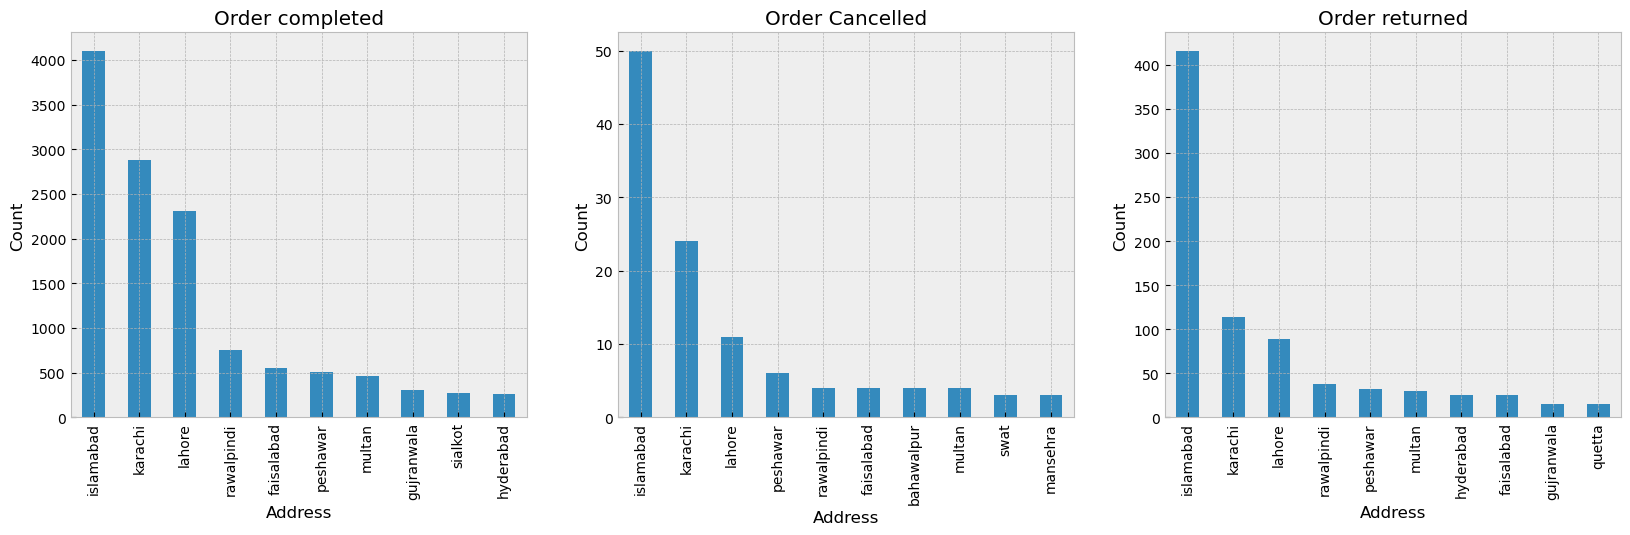

In [58]:
plt.figure(figsize=(20,5))

#Order completed
plt.subplot(1,3,1)
df[df['Order Status']=='Completed']['Address'].value_counts().head(10).plot.bar()
plt.title('Order completed')
plt.xlabel('Address')
plt.ylabel('Count')

#Order cancelled
plt.subplot(1,3,2)
df[df['Order Status']=='Cancelled']['Address'].value_counts().head(10).plot.bar()
plt.title('Order Cancelled')
plt.xlabel('Address')
plt.ylabel('Count')

#Order returned 
plt.subplot(1,3,3)
df[df['Order Status']=='Returned']['Address'].value_counts().head(10).plot.bar()
plt.title('Order returned')
plt.xlabel('Address')
plt.ylabel('Count')

# 5.Hidden patterns that are counter-intuitive for a layman

**Sales by weekend**

In [59]:
df.head(10)

,Order Number,Order Status,Book Name,Order Date,Address,Payment Method,Total items,Total weight (grams),Hour,Time,Month Year,Full Date,Day,Date
1,308,Completed,kaggle for begginers,2019-10-03 15:54:00,rawalpindi,Cash on Delivery,1,200.0,15,15:54,2019-10,2019-10-03,Thursday,3
2,309,Completed,kaggle for begginers,2019-10-03 16:09:00,hyderabad,Cash on Delivery,2,200.0,16,16:09,2019-10,2019-10-03,Thursday,3
3,310,Cancelled,kaggle for begginers,2019-10-03 16:42:00,rawalpindi,Cash on Delivery,1,200.0,16,16:42,2019-10,2019-10-03,Thursday,3
4,311,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 16:44:00,karachi,Cash on Delivery,1,200.0,16,16:44,2019-10,2019-10-03,Thursday,3
5,312,Completed,bit coin block chain aur crypto currency بٹ کو...,2019-10-03 18:17:00,faisalabad,Cash on Delivery,5,200.0,18,18:17,2019-10,2019-10-03,Thursday,3
7,315,Completed,global science - issue 219,2019-10-03 19:34:00,islamabad,Cash on Delivery,2,200.0,19,19:34,2019-10,2019-10-03,Thursday,3
8,316,Completed,har shaye ka nazria - ہر شے کا نظریہ,2019-10-03 20:27:00,karachi,Cash on Delivery,2,200.0,20,20:27,2019-10,2019-10-03,Thursday,3
9,3162,Completed,c++ ++سی,2019-11-12 12:40:00,islamabad,Cash on delivery,8,200.0,12,12:40,2019-11,2019-11-12,Tuesday,12
10,3170,Completed,data structures,2019-11-12 14:30:00,nankana sahib,Cash on delivery,1,200.0,14,14:30,2019-11,2019-11-12,Tuesday,12
11,3182,Completed,data structures,2019-11-12 17:38:00,sialkot,Cash on delivery,2,200.0,17,17:38,2019-11,2019-11-12,Tuesday,12


In [60]:
X= df['Day'].value_counts()
print('Sales regarding days:','\n',X)

Sales regarding days: 
 Saturday     4268
Sunday       3651
Friday       2911
Monday       2453
Tuesday      2039
Wednesday    1967
Thursday     1940
Name: Day, dtype: int64


> Sales ratio is much high at weekend(Friday,Saturday,Sunday)

[Text(0.5, 1.0, 'Sales by Days')]

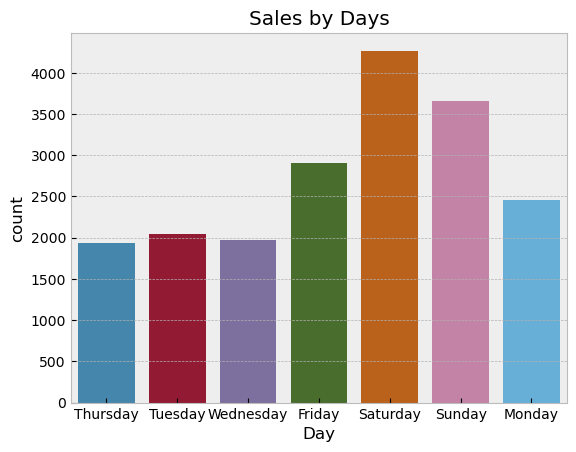

In [61]:
sns.countplot(data=df,x='Day').set(title='Sales by Days')

**Orders Regardin mode of payment**

In [62]:
df['Payment Method'].value_counts()

Cash on delivery    17470
EasyPaisa             697
JazzCash              596
BankTransfer          459
Cash on Delivery        7
Name: Payment Method, dtype: int64

In [63]:
df['Payment Method'] = df['Payment Method'].str.lower()

In [64]:
df['Payment Method'].value_counts()

cash on delivery    17477
easypaisa             697
jazzcash              596
banktransfer          459
Name: Payment Method, dtype: int64

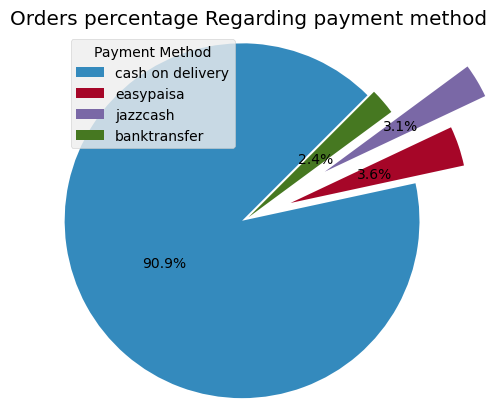

In [65]:
payment_mode = df['Payment Method'].value_counts()
explode = (0.05,0.3,0.6,0)
plt.pie(payment_mode.values,autopct='%1.1f%%',radius=1.2,startangle=45,explode=explode,pctdistance=0.5)
plt.title('Orders percentage Regarding payment method')
plt.legend(payment_mode.index,title='Payment Method',loc='upper left')